In [146]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl
import time

In [147]:
%matplotlib inline

In [148]:
# Generate 2 Dummy Datasets
cluster1 = np.random.normal(loc=[0, 10], scale=[30, 10], size=(100, 2))
cluster2 = np.random.normal(loc=[80, 160], scale=[20, 45], size=(100, 2))

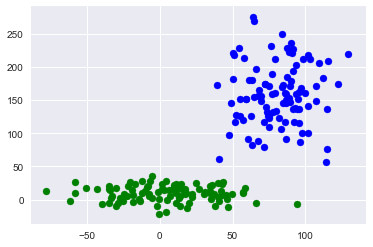

In [149]:
# Visualize the Dataset
# I am creating two clusters here so that the ouput will have significant difference
plt.scatter(x=cluster1[:,0:1],y=cluster1[:,1:2], c="g")
plt.scatter(x=cluster2[:,0:1],y=cluster2[:,1:2], c="b")
plt.show()

In [161]:
# Number of clusters
k_value = 2

# Finalize Data into one
cluster_data = np.concatenate((cluster1, cluster2), axis = 0)

row_size = cluster_data.shape[0]
col_size = cluster_data.shape[1]

# Calculate Mean and SD
mean = np.mean(cluster_data, axis = 0)
std = np.std(cluster_data, axis = 0)

# Calculate centroids with SD and mean so that they represent the core
centroids = np.random.randn(k_value, col_size)*std + mean

--------------------------------------------------
Random Centroids
--------------------------------------------------


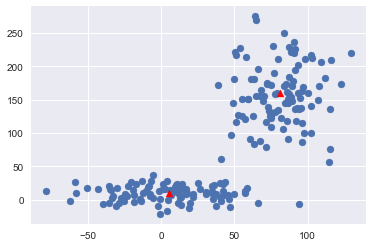

--------------------------------------------------
--------------------------------------------------
Adjusted Centroids
--------------------------------------------------


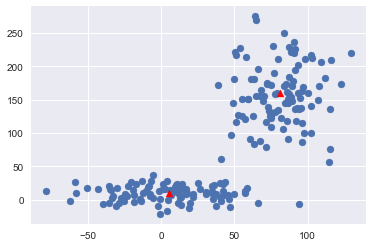

--------------------------------------------------


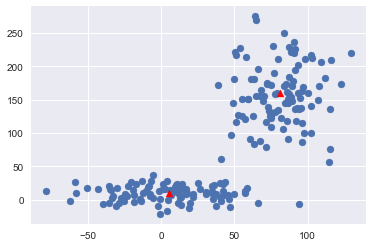

In [167]:
# Assign old and new centroids
centroids_old = np.zeros(centroids.shape)
centroids_new = centroids

# Initialize clusters and distances arrays
cluster_data.shape
clusters = np.zeros(row_size)
distances = np.zeros((row_size,k_value))

# Error calculated between new and old centroid values
error = np.linalg.norm(centroids_new - centroids_old)

print('-'*50)
print("Random Centroids")
print('-'*50)
plt.scatter(x=cluster_data[:,0:1],y=cluster_data[:,1:2])
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='r')
plt.show()
print('-'*50)

print('-'*50)
print("Adjusted Centroids")
print('-'*50)

# Calculate the best possible centroids and keep updating them
while error != 0:
    # Finding the distances
    for i in range(k_value):
        distances[:,i] = np.linalg.norm(cluster_data - centroids[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    # Copying old centroids to new centroids
    centroids_old = centroids_new
    # Adjust New Centroids values
    for i in range(k_value):
        centroids_new[i] = np.mean(cluster_data[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    plt.scatter(x=cluster_data[:,0:1],y=cluster_data[:,1:2])
    plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='^', c='r')
    display.display(pl.gcf())
    
print('-'*50)

In [165]:
print("Solution : " + str(centroids_new))

Solution : [[   5.56698182   10.02788265]
 [  81.33865735  159.2131676 ]]


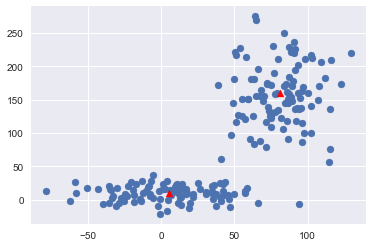

In [168]:
plt.scatter(x=cluster_data[:,0:1],y=cluster_data[:,1:2])
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='^', c='r')
plt.show()